In [32]:
import pandas as pd
import numpy as np
import random
from faker import Faker

In [33]:
random.seed(42)
np.random.seed(42)
fake = Faker()

In [34]:
data = {
    "Name": [fake.name() for _ in range(100)],
    "Age": [random.choice([25, 30, 35, np.nan, "forty", 50, 1000]) for _ in range(100)],
    "Salary": [random.choice([50000, 60000, 70000, np.nan, 9999999, 100000]) for _ in range(100)],
    "Join_Date": [fake.date_this_decade() if i % 10 != 0 else fake.date_this_century() for i in range(100)],
    "Department": [random.choice(["IT", "HR", "Finance", None, "Admin", ""]) for _ in range(100)]
}
df = pd.DataFrame(data)

df = pd.concat([df, df.iloc[:10]], ignore_index=True)

invalid_dates = ["32/01/2020", "2020-14-03", "01-01-20", "Invalid Date"]
indices = np.arange(0, len(df), 10)
num_invalid_dates_needed = len(indices)
invalid_dates_extended = (invalid_dates * (num_invalid_dates_needed // len(invalid_dates) + 1))[:num_invalid_dates_needed]
df.loc[indices, "Join_Date"] = invalid_dates_extended

# here thiss is shuffling as i get it
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df.to_csv('messy_dataset.csv', index=False)

In [35]:
df = pd.read_csv('messy_dataset.csv')
# count the missing value in eachh column

missing_count = df.isnull().sum()
print(f"missing values count :{missing_count}")

missing values count :Name           0
Age            9
Salary        15
Join_Date      0
Department    34
dtype: int64


In [36]:
# replace missing values in age with thierr median
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
median = df["Age"].median()
df.fillna({'Age': median}, inplace=True)
df.head()

,Name,Age,Salary,Join_Date,Department
0,Nichole Lamb,50.0,100000.0,2023-06-27,NaN
1,Sydney Brown,50.0,NaN,2020-14-03,Finance
2,Tanya Welch,35.0,100000.0,2021-01-27,IT
3,James Little,30.0,NaN,2024-01-17,IT
4,Christopher Fletcher,35.0,NaN,2020-03-30,IT


In [37]:
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df['Salary'] = df.groupby('Department')['Salary'].transform(lambda x: x.fillna(x.median()))

age_bins = pd.cut(df['Age'], bins=[0, 25, 30, 35, 40, 100])

mode_department = df.groupby(age_bins, observed=False)['Department'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

df['Department'] = df['Department'].fillna(df['Age'].map(mode_department))

df.head()


,Name,Age,Salary,Join_Date,Department
0,Nichole Lamb,50.0,NaN,2023-06-27,Finance
1,Sydney Brown,50.0,100000.0,2020-14-03,Finance
2,Tanya Welch,35.0,100000.0,2021-01-27,IT
3,James Little,30.0,60000.0,2024-01-17,IT
4,Christopher Fletcher,35.0,60000.0,2020-03-30,IT


In [38]:
#identifying and removing duplicatess

dupl_count = df.duplicated().sum()
print(dupl_count)

dupl_entries = df[df.duplicated(keep=False)]
print(dupl_entries)

df.drop_duplicates(inplace=True)
# iff u run this cell >1 times it will output nothing cuz duplicates will be removed..

9
                   Name   Age     Salary   Join_Date Department
2           Tanya Welch  35.0   100000.0  2021-01-27         IT
18    Ashley Rogers PhD  50.0    60000.0  2023-01-04         IT
32   Matthew Harrington  25.0    60000.0  2021-09-16         IT
38              Amy Cox  30.0    60000.0  2024-01-03      Admin
44          Tanya Welch  35.0   100000.0  2021-01-27         IT
47    Nathaniel Watkins  30.0        NaN  2024-04-21         IT
56    Ashley Rogers PhD  50.0    60000.0  2023-01-04         IT
57         Sandra Scott  25.0   100000.0  2023-11-17         HR
62        Barbara Green  50.0  9999999.0  2020-08-08      Admin
66       Jessica Jensen  30.0  9999999.0  2021-12-03    Finance
67              Amy Cox  30.0    60000.0  2024-01-03      Admin
76       Jessica Jensen  30.0  9999999.0  2021-12-03    Finance
85        Barbara Green  50.0  9999999.0  2020-08-08      Admin
88    Nathaniel Watkins  30.0        NaN  2024-04-21         IT
92         Sandra Scott  25.0   100000

In [40]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

salary_upper_limit = df['Salary'].quantile(0.95)
df.loc[df['Salary'] > salary_upper_limit, 'Salary'] = df.groupby('Department')['Salary'].transform('median')
df["Age"].head()
df["Salary"].head()

0         NaN
1    100000.0
2    100000.0
3     60000.0
4     60000.0
Name: Salary, dtype: float64

In [42]:
df['Join_Date'] = pd.to_datetime(df['Join_Date'], errors='coerce')
median_join_date = df['Join_Date'].median()

df['Join_Date'] = df['Join_Date'].fillna(median_join_date)

df.head()


,Name,Age,Salary,Join_Date,Department
0,Nichole Lamb,50.0,NaN,2023-06-27,Finance
1,Sydney Brown,50.0,100000.0,2022-07-29,Finance
2,Tanya Welch,35.0,100000.0,2021-01-27,IT
3,James Little,30.0,60000.0,2024-01-17,IT
4,Christopher Fletcher,35.0,60000.0,2020-03-30,IT


average salary by department Department
Admin      2.404706e+06
Finance    1.740833e+06
HR         2.284444e+06
IT         1.487143e+06
Name: Salary, dtype: float64
most common join date 2022-07-29 00:00:00


C:\Users\NOIKO\AppData\Local\Temp\ipykernel_8368\3296624985.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


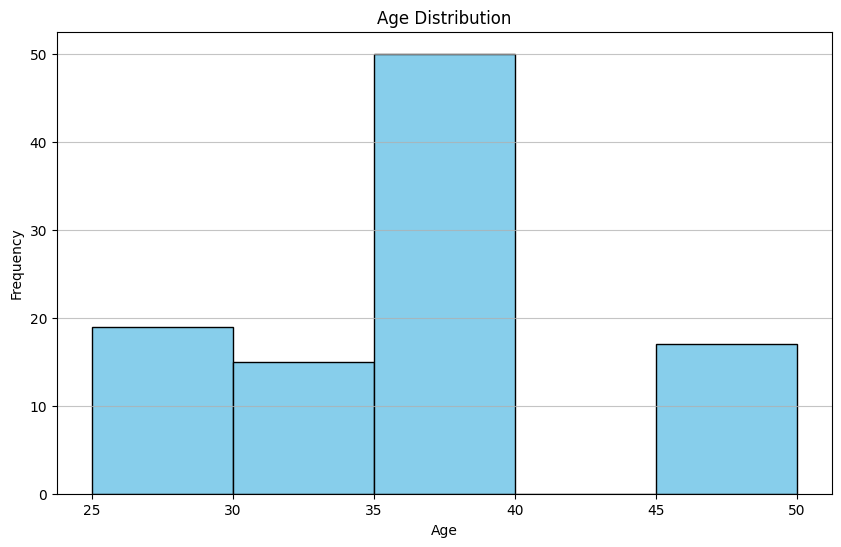

Top Departments Department
Finance    100000.0
HR         100000.0
Admin       70000.0
Name: Salary, dtype: float64


In [50]:
#avg salary by departmentt
average_salary_by_department = df.groupby('Department')['Salary'].mean()
print(f"average salary by department {average_salary_by_department}")

#most commonn join date
most_common_join_date = df['Join_Date'].mode()[0]
print(f"most common join date {most_common_join_date}")


#data checkingg
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df.loc[df['Age'] > 100, 'Age'] = np.nan
df['Age'].fillna(df['Age'].median(), inplace=True)



import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=5, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()
top_departments = df.groupby('Department')['Salary'].median().nlargest(3)
print(f"Top Departments {top_departments}")


In [56]:
#bonussss
# tenure or each employee
df['Join_Date'] = pd.to_datetime(df['Join_Date'])
current_date = pd.to_datetime('today')

df['Tenure'] = (current_date - df['Join_Date']).dt.days // 365


df['Tenure_Category'] = np.where(df['Tenure'] > 5, 'Experienced', 'Less Experienced')
print(df["Tenure"].head())
print()
print(df["Tenure_Category"].head())


0    1
1    2
2    3
3    0
4    4
Name: Tenure, dtype: int64

0    Less Experienced
1    Less Experienced
2    Less Experienced
3    Less Experienced
4    Less Experienced
Name: Tenure_Category, dtype: object
